<a href="https://colab.research.google.com/github/javierarteagapuell/deeplearning/blob/main/Ejercicio2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTAMOS LAS LIBRERÍAS

In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#PROCESAMIENTO DE DATOS

El primer paso es cargar los datos de nuestra base de datos y mostramos un resumen de esta para poder visualizar las columnas que tenemos

In [225]:
data = pd.read_csv('banco ufv.csv', encoding='latin-1', sep=';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [226]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [227]:
#data.to.csv('banco_nuevo.csv', index=False)

Comenzamos la limpieza de datos de nuestra base de datos.

In [228]:
if data.isnull().values.any():
  print("Hay NA's")
else:
  print("No hay NA's")

No hay NA's


NOTA: NO HAY NA'S PERO SI DATOS UNKNOWN

Continuamos limpiando nuestros datos.

En este caso comprobamos si hay algún dato duplicado 

In [229]:
if any(data.duplicated()):
  print("Hay datos duplicados")
else:
  print("No hay datos duplicados")

No hay datos duplicados


# APARTADO A

In [230]:
data=data.drop(['job','marital','default','housing','loan','contact','day','month','campaign','pdays','previous','poutcome','y'], axis=1)
data.head()
# NOS QUEDAMOS CON: age (años), education (educación), balance (saldo) y duration (días como cliente)

,age,education,balance,duration
0,58,tertiary,2143,261
1,44,secondary,29,151
2,33,secondary,2,76
3,47,unknown,1506,92
4,33,unknown,1,198


COLUMNAS CON LAS QUE NOS HEMOS QUEDADO

In [231]:
data.columns

Index(['age', 'education', 'balance', 'duration'], dtype='object')

PASAR LA VARIBALE EDUCATION DE CATEGÓRICA A NUMÉRICA:

Primary-->1
Secondary-->2
Terciary-->3
Unknow-->4

In [232]:
for i in range(0, len(data)):
  if data.loc[i, 'education'] == 'primary':
    data.loc[i, 'education_new'] = '1'
  elif data.loc[i, 'education'] == 'secondary':
    data.loc[i, 'education_new'] = '2'
  elif data.loc[i, 'education'] == 'terciary':
    data.loc[i, 'education_new'] = '3'
  else:
    data.loc[i, 'education_new'] = '4'

data=data.drop(['education'], axis=1)

In [233]:
data

,age,balance,duration,education_new
0,58,2143,261,4
1,44,29,151,2
2,33,2,76,2
3,47,1506,92,4
4,33,1,198,4
...,...,...,...,...
45206,51,825,977,4
45207,71,1729,456,1
45208,72,5715,1127,2
45209,57,668,508,2


In [234]:
data.columns

Index(['age', 'balance', 'duration', 'education_new'], dtype='object')

MOSTRAMOS DE QUE TIPOP SON NUESTRAS VARIABLES

In [235]:
data.dtypes

age               int64
balance           int64
duration          int64
education_new    object
dtype: object

VAMOS A PASAR EDUCATION_NEW DE OBJECT A INT64 PARA PODER USARLA EN EL FUTURO

Para ello nos creamos una columna que sea educacion_final que es 
exactamente igual que educacion_new pero esta es numérica y eliminamos la
vieja versión de education_new

In [236]:
education_final=pd.to_numeric(data['education_new'])
data=data.drop(['education_new'], axis=1)

In [237]:
data = pd.concat([data, education_final], axis=1)
data

,age,balance,duration,education_new
0,58,2143,261,4
1,44,29,151,2
2,33,2,76,2
3,47,1506,92,4
4,33,1,198,4
...,...,...,...,...
45206,51,825,977,4
45207,71,1729,456,1
45208,72,5715,1127,2
45209,57,668,508,2


In [238]:
data.dtypes

age              int64
balance          int64
duration         int64
education_new    int64
dtype: object

Una vez hemos pasado todas nuestras variables a numéricas podemos proceder a ver si hay valores atípicos y así concluimos nuestra limpieza de nuestra base de datos (banco ufv)

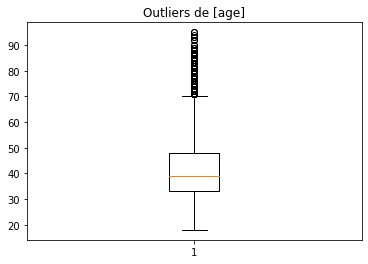

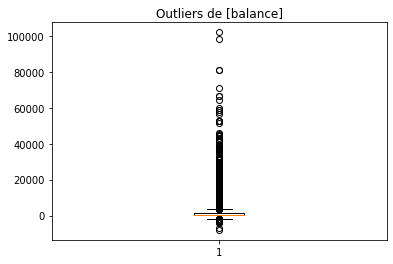

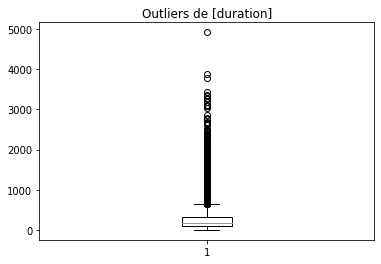

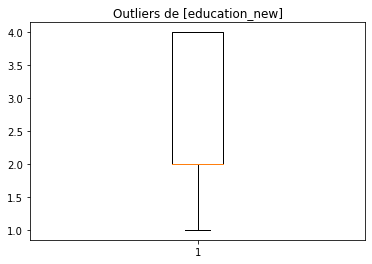

In [239]:
#HAY VALORES ATÍPICOS

for i in data.columns:
  arr = data[i]
  plt.boxplot(arr)
  plt.title("Outliers de [{0}]".format(i))
  plt.show()

Podemos ver que los datos atípicos de la varibale age son aquellos que superan los 67 años, es decir, todos aquellos datos compuestos por jubilados. No los podemos eliminar debido a que los vamos a necesitar más adelante

¿Está directamente relacionado el nivel de estudios con el saldo de cada 
cliente en la cuenta?

In [261]:
correlacion=data['education_new'].corr(data['balance'])
if correlacion>0:
  if correlacion>0.6:
    print("Existe una correlación positiva entre el nivel de estudios y el saldo -->", correlacion)
    print("Es decir, hay una asociación alta y directa entre el nivel de estudios y el saldo")
  else:
    print("Existe una correlación positiva entre el nivel de estudios y el saldo -->", correlacion)
    print("Es decir, hay una asociación baja y directa entre el nivel de estudios y el saldo")
else:
  if correlacion<-0.6:
    print("Existe una correlación negativa entre el nivel de estudios y el saldo -->", correlacion)
    print("Es decir, hay una asociación alta e indirecta entre el nivel de estudios y el saldo")
  else:
    print("Existe una correlación negativa entre el nivel de estudios y el saldo -->", correlacion)
    print("Es decir, hay una asociación baja e indirecta entre el nivel de estudios y el saldo")


Existe una correlación positiva entre el nivel de estudios y el saldo --> 0.07823947518472403
Es decir, hay una asociación baja y directa entre el nivel de estudios y el saldo


Está directamente relacionado el nivel de estudios con el saldo de cada 
cliente en la cuenta pero esta relación/asociación es muy baja (prácticamente nula) ya que la correlación entre estas dos variables está muy cerca de cero.

PODEMOS HACER LA CORRELACIÓN ENTRE TODAS NUESTRA VARIABLES DE LA SIGUIENTE FORMA

In [262]:
from scipy.stats.stats import pearsonr
data.corr(method="pearson")

,age,balance,duration,education_new
age,1.000000,0.097783,-0.004648,-0.105865
balance,0.097783,1.000000,0.021560,0.078239
duration,-0.004648,0.021560,1.000000,0.001676
education_new,-0.105865,0.078239,0.001676,1.000000


Podemos ver que la correlación entre todas las variables es bastante baja (a excepción de ellas consigo mismas).

Esto nos indica que apenas hay asociación entre las distintas variables

Para ello estableceremos 3 rangos numéricos: los que tienen deudas, la gente que tiene 
unos ahorros normales (en positivo, pero menos de 10.000 euros) y los que disponen de suficientes ahorros 
como para ofrecerles paquetes de inversión (aquellos en positivo con más de 10.000 euros). 

In [263]:
Deuda = data['balance'].apply(lambda val: val  <0 )
Ahorros = data['balance'].apply(lambda val: val>=0) & data['balance'].apply(lambda val: val<=10000)
Paquetes_De_Inversión = data['balance'].apply(lambda val: val >10000)

Num_Deuda=sum(bool(x) for x in Deuda)
Num_Ahorros=sum(bool(x) for x in Ahorros)  
Num_Paquetes_De_Inversión=sum(bool(x) for x in Paquetes_De_Inversión)

Num_Total=len(data['balance'])

Porcentaje_Num_Deuda=(Num_Deuda/Num_Total)*100
Porcentaje_Num_Ahorros=(Num_Ahorros/Num_Total)*100
Porcentaje_Num_Paquetes_De_Inversión=(Num_Paquetes_De_Inversión/Num_Total)*100

print("El numero de personas con deudas es de: ", Num_Deuda, "que es un", Porcentaje_Num_Deuda, "%")
print("El numero de personas con ahorros es de: ", Num_Ahorros, "que es un", Porcentaje_Num_Ahorros, "%")
print("El numero de personas con paquetes de inversión es de: ", Num_Paquetes_De_Inversión, "que es un", Porcentaje_Num_Paquetes_De_Inversión, "%")

El numero de personas con deudas es de:  3766 que es un 8.329831235761208 %
El numero de personas con ahorros es de:  40616 que es un 89.8365442038442 %
El numero de personas con paquetes de inversión es de:  829 que es un 1.8336245603945942 %


Imprimimos los sueldos

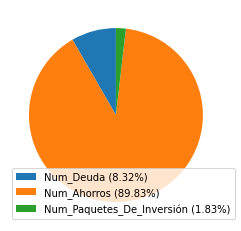

In [264]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array([Num_Deuda, Num_Ahorros, Num_Paquetes_De_Inversión])
mylabels= ["Num_Deuda (8.32%)", "Num_Ahorros (89.83%)", "Num_Paquetes_De_Inversión (1.83%)"]

plt.pie(y, startangle = 90)
plt.legend(labels = mylabels, loc="best")
plt.show() 


# APARTADO B

Hacer una transformación:
Alumnos hasta  30  años.  Trabajadores  jóvenes 
  30  a 45  años,  trabajadores  veteranos de  46  a 65  y el  resto  serán  clientes  no 
vinculados a la Universidad. Obten un gráfico donde podamos ver como se distribuye cada clase. Interpreta 
los datos. 

In [265]:
Alumnos = data['age'].apply(lambda val: val  <30 )
Trabajadores_Jóvenes = data['age'].apply(lambda val: val>=30) & data['age'].apply(lambda val: val<=45)
Trabajadores_Veteranos = data['age'].apply(lambda val: val>45) & data['age'].apply(lambda val: val<=65)
Jubilados= data['age'].apply(lambda val: val >65)

Num_Alumnos=sum(bool(x) for x in Alumnos)
Num_Trabajadores_Jóvenes=sum(bool(x) for x in Trabajadores_Jóvenes)  
Num_Trabajadores_Veteranos=sum(bool(x) for x in Trabajadores_Veteranos)
Num_Jubilados=sum(bool(x) for x in Jubilados)

Num_Total=len(data['age'])

Porcentaje_Num_Alumnos=(Num_Alumnos/Num_Total)*100
Porcentaje_Num_Trabajadores_Jóvenes=(Num_Trabajadores_Jóvenes/Num_Total)*100
Porcentaje_Num_Trabajadores_Veteranos=(Num_Trabajadores_Veteranos/Num_Total)*100
Porcentaje_Num_Jubilados=(Num_Jubilados/Num_Total)*100

print("El numero de personas con alumnos es de: ", Num_Alumnos, "que es un", Porcentaje_Num_Alumnos, "%")
print("El numero de personas con trabadores jóvenes es de: ", Num_Trabajadores_Jóvenes, "que es un", Porcentaje_Num_Trabajadores_Jóvenes, "%")
print("El numero de personas con trabadores veteranos es de: ", Num_Trabajadores_Veteranos, "que es un", Porcentaje_Num_Trabajadores_Veteranos, "%")
print("El numero de personas con jubilados es de: ", Num_Jubilados, "que es un", Porcentaje_Num_Jubilados, "%")



El numero de personas con alumnos es de:  5273 que es un 11.663090840724601 %
El numero de personas con trabadores jóvenes es de:  25490 que es un 56.380084492711944 %
El numero de personas con trabadores veteranos es de:  13697 que es un 30.295724491827208 %
El numero de personas con jubilados es de:  751 que es un 1.6611001747362366 %


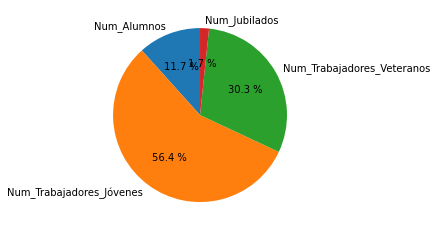

In [266]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array([Num_Alumnos, Num_Trabajadores_Jóvenes, Num_Trabajadores_Veteranos, Num_Jubilados])
mylabels= ["Num_Alumnos", "Num_Trabajadores_Jóvenes", "Num_Trabajadores_Veteranos", "Num_Jubilados"]

plt.pie(y, labels = mylabels, autopct="%0.1f %%" , startangle = 90)
plt.show() 


# APARTADO C

Pasamos el tiempo que llevan los clientes de esta empresa de días a años

In [267]:
data.duration=data.duration/365
data

,age,balance,duration,education_new
0,58,2143,0.715068,4
1,44,29,0.413699,2
2,33,2,0.208219,2
3,47,1506,0.252055,4
4,33,1,0.542466,4
...,...,...,...,...
45206,51,825,2.676712,4
45207,71,1729,1.249315,1
45208,72,5715,3.087671,2
45209,57,668,1.391781,2


Hacemos una distribución de frecuencia para mostrar como están repartidos los clientes respecto al nº de años que llevan en la empresa 

In [268]:
# Distribución de frecuencia.
# 1ro creamos un rango para las categorías.

particiones = np.arange(0, 7, 0.5)

# luego cortamos los datos en cada contenedor 
frec = pd.cut(data['duration'], particiones)

# por último hacemos el recuento de los contenedores
# para armar la tabla de frecuencia.
tabla_frec = pd.value_counts(frec)
tabla_frec


(0.0, 0.5]    22892
(0.5, 1.0]    13181
(1.0, 1.5]     4613
(1.5, 2.0]     2116
(2.0, 2.5]     1044
(2.5, 3.0]      571
(3.0, 3.5]      351
(3.5, 4.0]      180
(4.0, 4.5]      109
(4.5, 5.0]       54
(5.0, 5.5]       38
(5.5, 6.0]       19
(6.0, 6.5]       10
Name: duration, dtype: int64

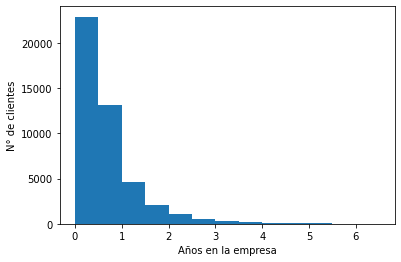

In [269]:
particiones = np.arange(0, 7, 0.5)
plt.hist(data['duration'], particiones)
plt.xlabel("Años en la empresa")
plt.ylabel("N° de clientes")
plt.show()

Podemos ver como esta empresa está compuesta principalmente por trabajadores nuevos. 

Esto puede darse debido a que sea una empresa relativamente nueva o que haya experimentado un crecimiento muy notable en los últimos 3/4 años y por eso haya necesitado contratar a un gran número de empleados.